## Import 

Slúži na importovanie datasetov do notebooku, taktiež sa importuju knižnice, ktoré budeme v notebooku používať

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

data_apartmans = pd.read_csv("predaj_byty.csv")
data_houses = pd.read_csv("predaj_domy.csv")
data_combined = pd.read_csv("predaj_spolu.csv")

### Preskúmanie dát
Bunka obsahuje príkazy pre bližšie preskúmanie Dataframov s datasetmi

In [166]:
# data_apartmans.shape,
# data_houses.shape,
# data_combined.shape
# data_combined.head()
# data_combined.tail()
# data_combined.info()
# data_combined.describe()
# data_combined.state.value_counts()

,price,locality,street,usable_area,floor,elevator,state,real_estate_type,balcony,basement,material,land,build_up_area
19078,22000.0,Černík,__,50.0,NaN,False,NaN,Záhradná chata,False,False,NaN,2540.0,25.0
11382,115500.0,Komárno,NaN,74.0,NaN,False,kompletná rekonštrukcia,3 izbový byt,False,False,NaN,NaN,NaN
22943,355000.0,Banská Bystrica,Banská Bystrica,190.0,NaN,False,novostavba,Rodinný dom,False,False,NaN,1646.0,95.0
3824,245000.0,Bratislava II Vrakuňa,NaN,92.0,4/5,False,čiastočná rekonštrukcia,4 izbový byt,True,False,NaN,NaN,NaN
5609,116000.0,Bratislava V Petržalka,Šustekova,29.0,9/0,True,kompletná rekonštrukcia,Garsónka,True,True,panel,NaN,NaN


In [2]:
data_combined.loc[data_combined["state_of_real_estate"] == 'Novostavba', "state"] = 'novostavba'
data_combined.drop(['state_of_real_estate', 'type_of_ownership', 'price_for_m2'], axis=1, inplace=True)

data_houses.loc[data_houses["state_of_real_estate"] == 'Novostavba', "state"] = 'novostavba'
data_houses.drop(['state_of_real_estate', 'type_of_ownership', 'price_for_m2', 'floor', 'elevator', 'balcony', 'basement', 'material'], axis=1, inplace=True)

data_apartmans.loc[data_apartmans["state_of_real_estate"] == 'Novostavba', "state"] = 'novostavba'
data_apartmans.drop(['state_of_real_estate', 'type_of_ownership', 'price_for_m2'], axis=1, inplace=True)

data_combined.shape

(29371, 13)

In [3]:
with open('city.txt', 'r') as f:
  cities = f.read().splitlines() 

for city in cities:
  data_apartmans.loc[
    data_apartmans['locality'].str.contains('{} '.format(city)),
    ['locality']
  ] = city

<ipython-input-3-7266607ccae0>:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data_apartmans['locality'].str.contains('{} '.format(city)),


In [4]:
# get all non cz cities
np.set_printoptions(threshold=sys.maxsize)
not_sk_city = data_combined

with open('city.txt', 'r') as f:
  cities = f.read().splitlines() 

for city in cities:
  not_sk_city = not_sk_city[not_sk_city["locality"].str.contains(city)==False]

# remove all czech cities
for city in not_sk_city["locality"].unique():
  data_combined = data_combined[data_combined["locality"].str.contains(city)==False]
  data_houses = data_houses[data_houses["locality"].str.contains(city)==False]
  data_apartmans = data_apartmans[data_apartmans["locality"].str.contains(city)==False]

<ipython-input-4-479983ab5da7>:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  not_sk_city = not_sk_city[not_sk_city["locality"].str.contains(city)==False]


### Histogram price

In [5]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   print(q1)
   q3=df.quantile(0.75)
   print(q3)
   IQR=q3-q1
   print(IQR)
   print(q1-1.5*IQR)
   print(q3+1.5*IQR)
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

combined_outliers = find_outliers_IQR(data_combined["price"])
houses_outliers = find_outliers_IQR(data_houses["price"])
apartmans_outliers = find_outliers_IQR(data_apartmans["price"])
# print("number of outliers: "+ str(len(outliers)))
# print("max outlier value: "+ str(outliers.max()))
# print("min outlier value: "+ str(outliers.min()))

combined_without_oltliers = data_combined[~data_combined["price"].isin(combined_outliers)]
houses_without_oltliers = data_houses[~data_houses["price"].isin(houses_outliers)]
apartmans_without_oltliers = data_apartmans[~data_apartmans["price"].isin(apartmans_outliers)]

112875.0
259000.0
146125.0
-106312.5
478187.5
99000.0
285000.0
186000.0
-180000.0
564000.0
117000.0
239000.0
122000.0
-66000.0
422000.0


In [6]:
combined_without_oltliers.dropna(subset=['price'], inplace=True)
houses_without_oltliers.dropna(subset=['price'], inplace=True)
apartmans_without_oltliers.dropna(subset=['price'], inplace=True)

/home/kubo/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


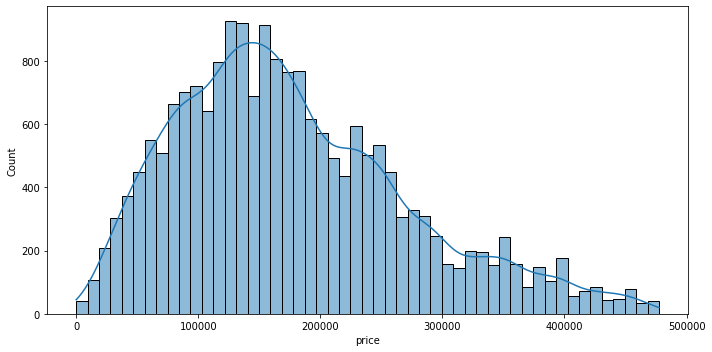

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(combined_without_oltliers["price"], kde = True)
ax.ticklabel_format(useOffset=False, style='plain')
plt.tight_layout()
plt.show()

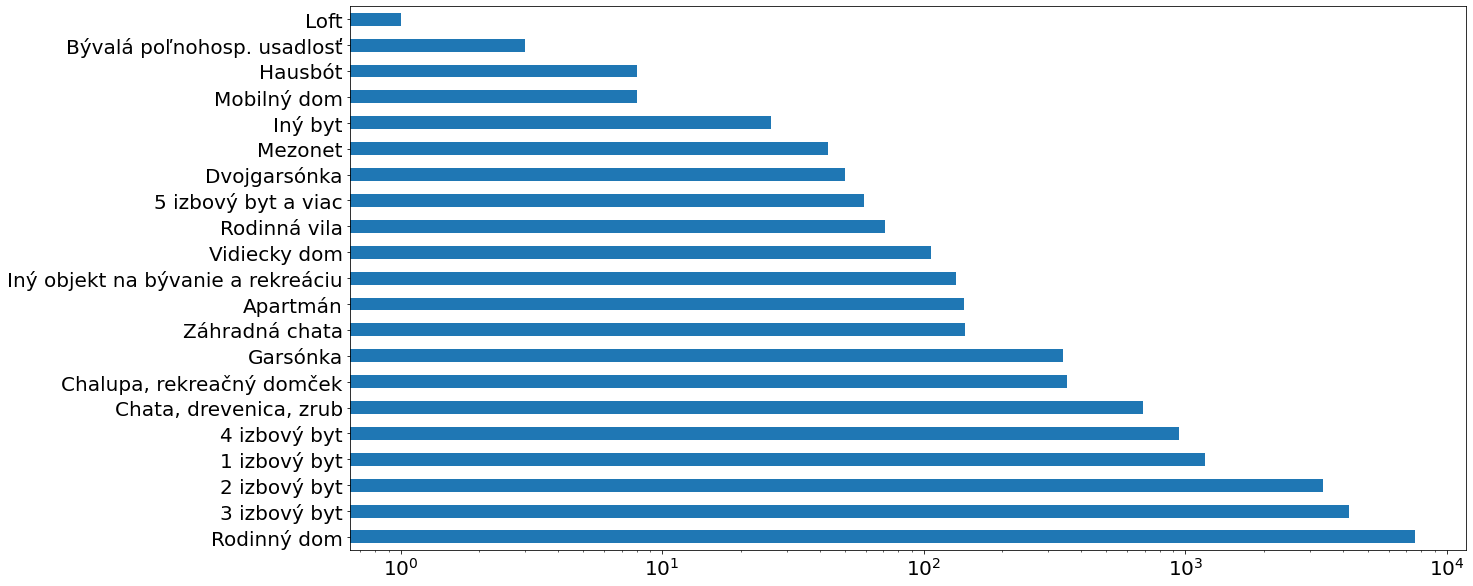

In [178]:
import seaborn as sns

# test data, loads a pandas dataframe
fig, ax = plt.subplots(figsize=(20,10))
ax = combined_without_oltliers.real_estate_type.value_counts().plot(kind='barh')
ax.set_xscale('log')
plt.rc('ytick', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.show()


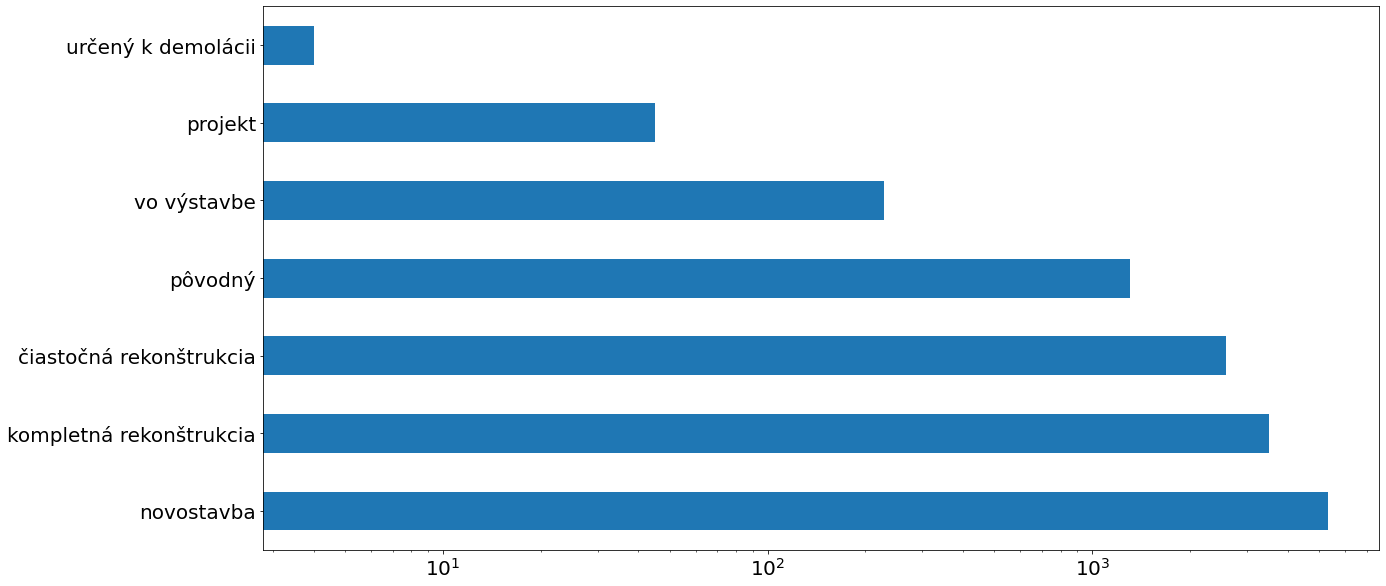

In [177]:
fig, ax = plt.subplots(figsize=(20,10))
ax = combined_without_oltliers.state.value_counts().plot(kind='barh')
ax.set_xscale('log')
plt.rc('ytick', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.show()


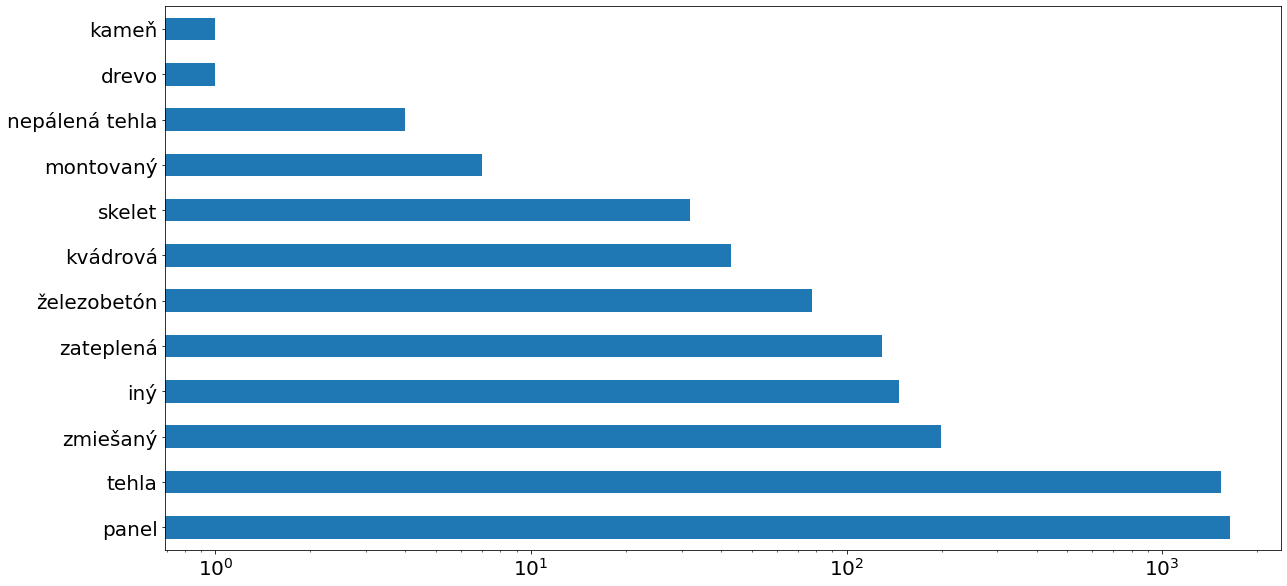

In [176]:
fig, ax = plt.subplots(figsize=(20,10))
ax = combined_without_oltliers.material.value_counts().plot(kind='barh')
ax.set_xscale('log')
plt.rc('ytick', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.show()


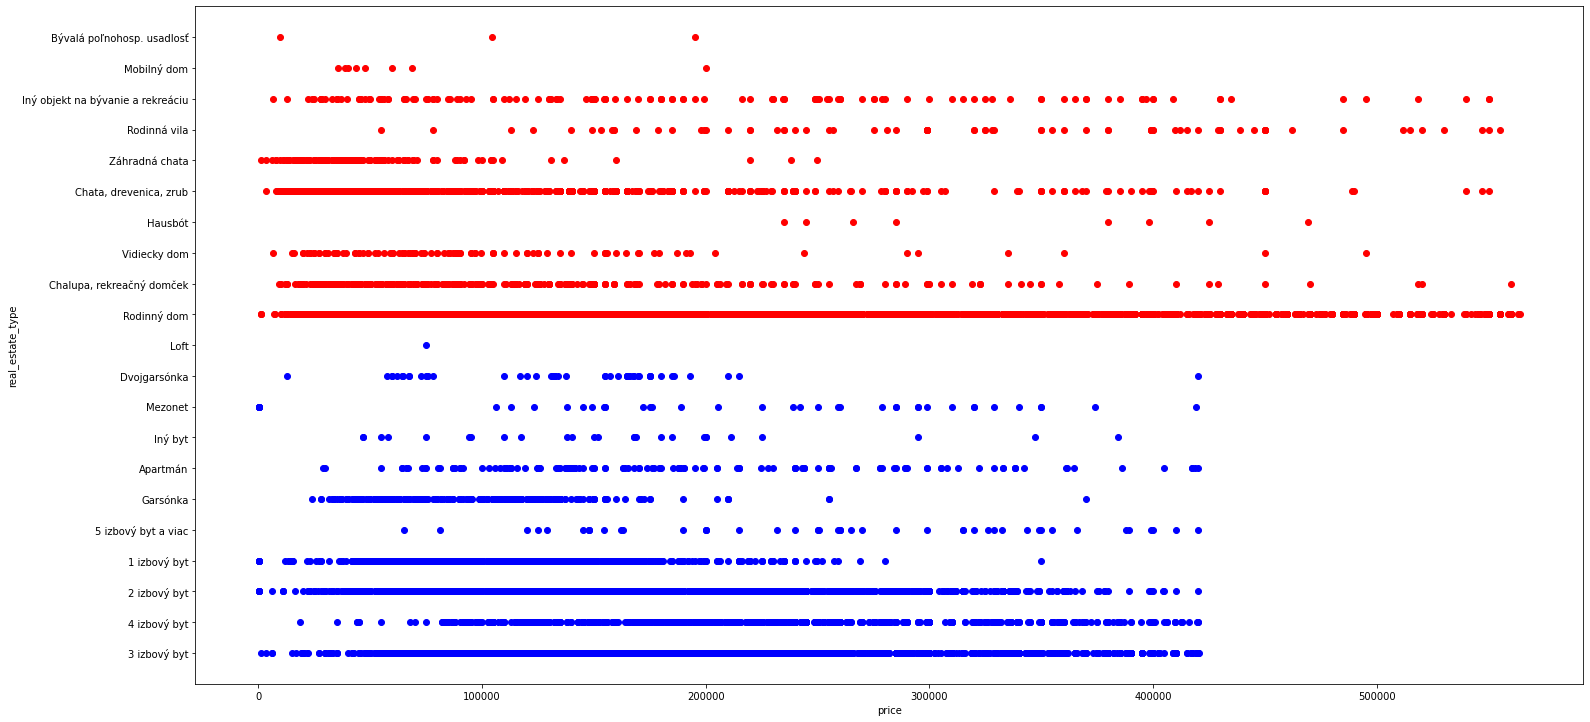

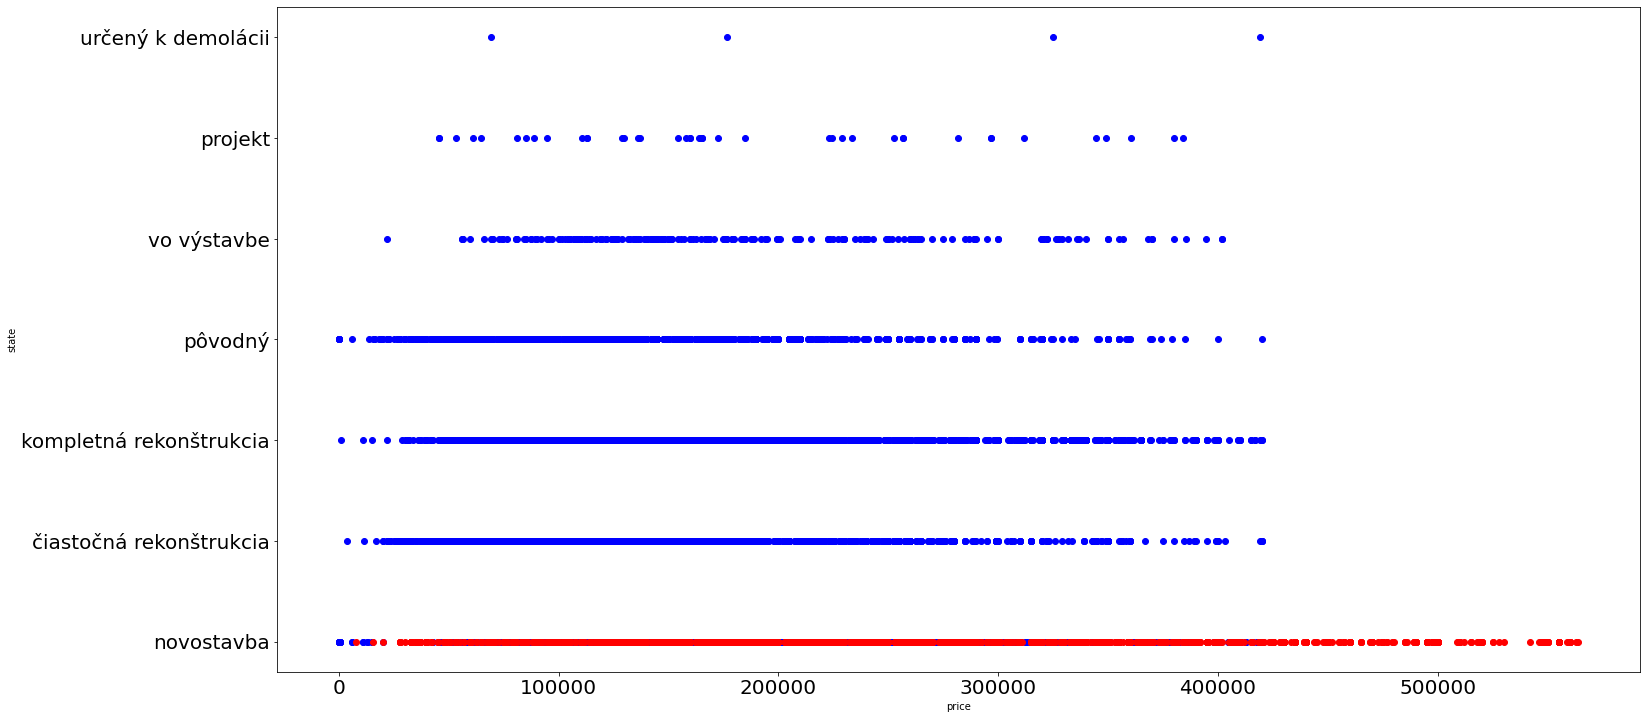

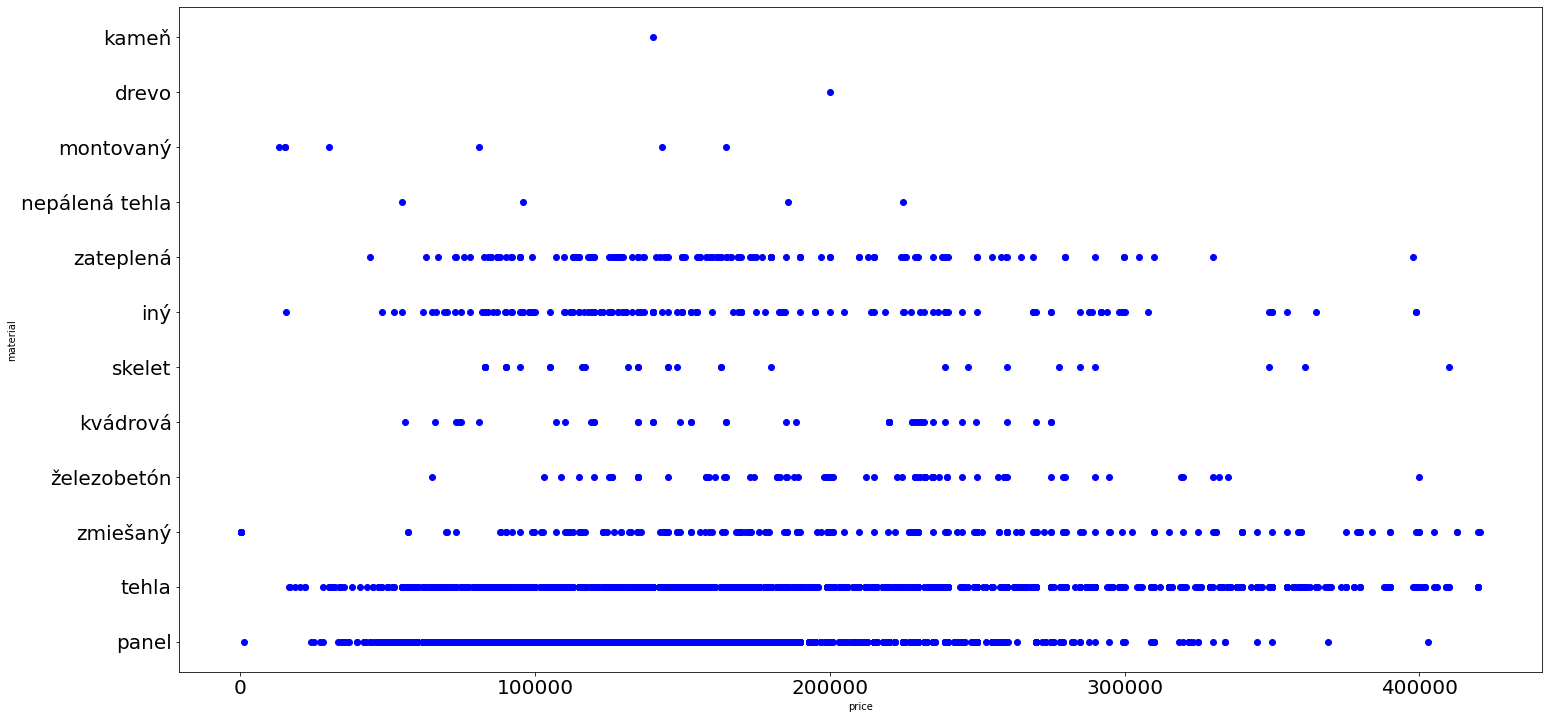

In [21]:
list = ["real_estate_type", "state", "material"]

for parameter in list:
  non_nan_without_oltliers_apartmans = apartmans_without_oltliers[apartmans_without_oltliers[parameter].notna()]
  non_nan_without_oltliers_houses = houses_without_oltliers[houses_without_oltliers[parameter].notna()]

  fig, ax = plt.subplots(figsize=(20,10))
  ax.ticklabel_format(useOffset=False, style='plain')
  plt.tight_layout()

  plt.scatter(non_nan_without_oltliers_apartmans["price"], non_nan_without_oltliers_apartmans[parameter], color = "blue")
  plt.scatter(non_nan_without_oltliers_houses["price"], non_nan_without_oltliers_houses[parameter], color = "red")
  
  plt.xlabel('price')
  plt.ylabel(parameter)
  plt.rc('ytick', labelsize=20) 
  plt.rc('xtick', labelsize=20) 
  plt.show()

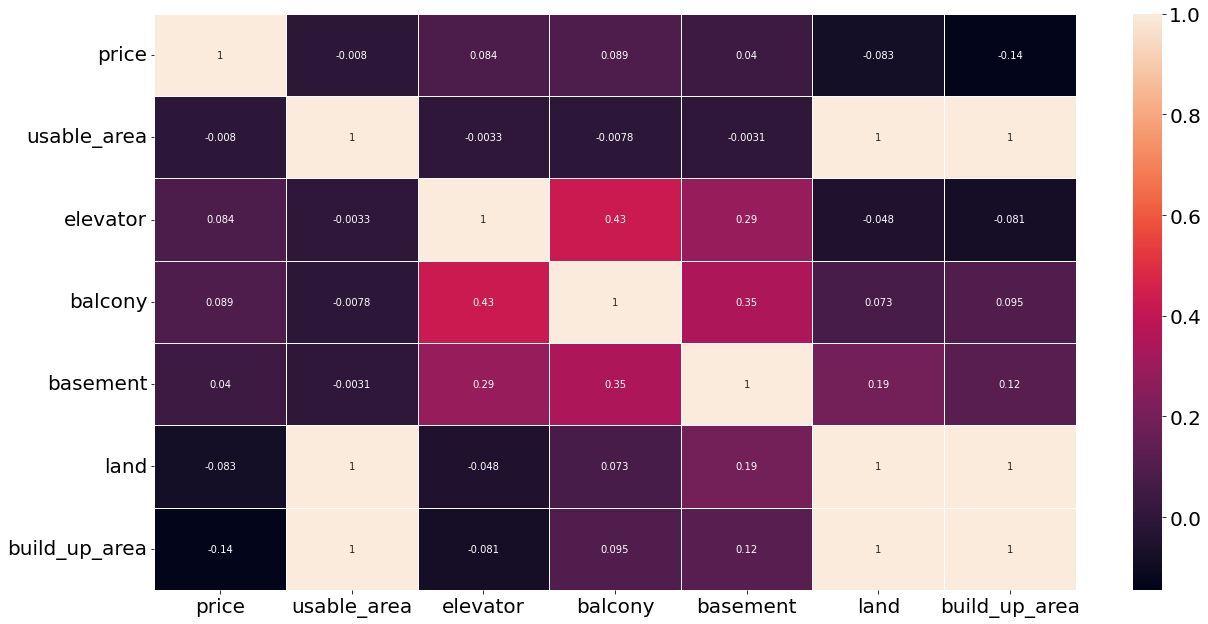

In [22]:
corr_metrix = apartmans_without_oltliers.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_metrix, annot=True, linewidths=1, ax=ax)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

## Getting data ready

#### Split the data (X and y)

In [179]:
data_apartmans = apartmans_without_oltliers
data_houses = houses_without_oltliers
data_combined = combined_without_oltliers

data_apartmans = data_apartmans.sample(frac = 1)
X_apartmans = data_apartmans.drop("price", axis=1)
y_apartmans = data_apartmans["price"]

data_houses = data_houses.sample(frac = 1)
X_houses = data_houses.drop("price", axis=1)
y_houses = data_houses["price"]

data_combined = data_combined.sample(frac = 1)
X_combined = data_combined.drop("price", axis=1)
y_combined = data_combined["price"]

In [180]:
from math import remainder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

apartmans_num_features = [
  "usable_area",
  "land",
  "build_up_area"
]

apartmans_cat_features = [
  "locality",
  "street", 
  "state",
  "real_estate_type",
  "material",
  "floor",
  "elevator",
  "balcony",
  "basement",
]

houses_num_features = [
  "usable_area",
  "land",
  "build_up_area"
]

houses_cat_features = [
  "locality",
  "street", 
  "state",
  "real_estate_type",
]

numeric_transformer = Pipeline(
    steps=[
      ("imputer", SimpleImputer(strategy="mean")),
      ("scaler", MinMaxScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
      ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
      ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]
)

houses_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, houses_num_features),
        ("cat", categorical_transformer, houses_cat_features),
    ]
)

apartmans_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, apartmans_num_features),
        ("cat", categorical_transformer, apartmans_cat_features),
    ]
)

combined_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, apartmans_num_features),
        ("cat", categorical_transformer, apartmans_cat_features),
    ]
)

In [188]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

svr = SVR()
lasso = Lasso()
forest = RandomForestRegressor()
elastic = ElasticNet()
ridge = Ridge()

model = lasso

In [189]:
from sklearn import set_config

apartmans_pipe = Pipeline(steps=[
    ('preprocessor', apartmans_preprocessor),
    ('model', model)

])

houses_pipe = Pipeline(steps=[
    ('preprocessor', houses_preprocessor),
    ('model', model)

])

combined_pipe = Pipeline(steps=[
    ('preprocessor', combined_preprocessor),
    ('model', model)

])

set_config(display='diagram')

apartmans_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['usable_area', 'land',
                                                   'build_up_area']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['locality', 'street',
                                                   'state', 'real_estate_type',
                                                   'material', 'floor',
                                                   'elevator', 'balcony',
                                                   'basement'])])),
                ('model', Lasso())])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

def evaluate_preds(y_true, y_preds):
    r2  = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds) 
    mse = mean_squared_error(y_true, y_preds)
    metric_dict = {"r2_socre": r2,
                   "mean_absolute_error": mae,
                   "mean_squared_error": mse,
    }

    print(f"R2: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    return metric_dict

#### Choosing the right estimator

In [144]:
from sklearn.model_selection import train_test_split, cross_val_score

X = X_apartmans
y = y_apartmans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
apartmans_pipe.fit(X_train, y_train)

y_preds = apartmans_pipe.predict(X_test)

baseline_metetrics = evaluate_preds(y_test, y_preds)

R2: -0.00
MAE: 59977.87
MSE: 5721955116.80


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24764906835196.574, tolerance: 4953416265.585689
  model = cd_fast.sparse_enet_coordinate_descent(


In [190]:
from sklearn.model_selection import GridSearchCV

forest_params = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

lasso_params = {'model__alpha':[0.01, 0.1, 1, 10, 100, 1000, 1500]}
ridge_params = {'model__alpha':[0.01, 0.1, 1, 10, 100, 1000, 1500]}

elastic_params = {
    "model__max_iter": [1, 5, 10, 100, 1000],
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "model__l1_ratio": np.arange(0.0, 1.0, 0.1)
}

svr_params = {
   'model__kernel': ['rbf', 'sigmoid'],
   'model__C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
   'model__epsilon': [0.1, 0.3, 0.7, 1.0, 1.3],
   'model__gamma': [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}

params = lasso_params

grid_search = GridSearchCV(houses_pipe, params, cv=5, verbose=2)

grid_search.fit(X_houses, y_houses)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8731790880648.176, tolerance: 10684502478.675917
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..................................model__alpha=0.01; total time=  57.3s


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9882427633395.143, tolerance: 10477697715.022102
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..................................model__alpha=0.01; total time= 1.0min


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7838729987480.205, tolerance: 10417824634.08537
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..................................model__alpha=0.01; total time=  58.7s


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8433299266525.558, tolerance: 10550884911.176949
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..................................model__alpha=0.01; total time=  57.8s


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8509048826897.133, tolerance: 10467725380.211731
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ..................................model__alpha=0.01; total time= 1.0min


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1764543404671.7969, tolerance: 10684502478.675917
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ...................................model__alpha=0.1; total time= 1.1min


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626221706829.8516, tolerance: 10477697715.022102
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ...................................model__alpha=0.1; total time= 1.0min


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1547164640343.1426, tolerance: 10417824634.08537
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ...................................model__alpha=0.1; total time= 1.0min


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1679474398205.0938, tolerance: 10550884911.176949
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ...................................model__alpha=0.1; total time= 1.0min


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996606390380.3711, tolerance: 10467725380.211731
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END ...................................model__alpha=0.1; total time=  57.5s


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2406213827291.6484, tolerance: 10684502478.675917
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .....................................model__alpha=1; total time=  56.0s


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1010458918844.4258, tolerance: 10477697715.022102
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .....................................model__alpha=1; total time=  58.9s


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 962487535661.3945, tolerance: 10417824634.08537
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .....................................model__alpha=1; total time= 1.1min


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2024206659498.6445, tolerance: 10550884911.176949
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .....................................model__alpha=1; total time=  59.1s


/home/kubo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 976400291407.1719, tolerance: 10467725380.211731
  model = cd_fast.sparse_enet_coordinate_descent(


[CV] END .....................................model__alpha=1; total time= 1.0min
[CV] END ....................................model__alpha=10; total time=  16.6s
[CV] END ....................................model__alpha=10; total time=  19.3s
[CV] END ....................................model__alpha=10; total time=  14.5s
[CV] END ....................................model__alpha=10; total time=  15.8s
[CV] END ....................................model__alpha=10; total time=  13.9s
[CV] END ...................................model__alpha=100; total time=   2.6s
[CV] END ...................................model__alpha=100; total time=   2.5s
[CV] END ...................................model__alpha=100; total time=   3.0s
[CV] END ...................................model__alpha=100; total time=   2.7s
[CV] END ...................................model__alpha=100; total time=   3.0s
[CV] END ..................................model__alpha=1000; total time=   0.6s
[CV] END ...................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['usable_area',
                                                                          'land',
                                                                          'build_up_area']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['locality',
                                                                          'street',
                                                                          'state',
                                                                          'real_estate_type'])])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100, 1000, 1500]},
             verbose=2)

In [192]:
# print(grid_search.best_estimator_)
# print(grid_search.best_score_)
print(grid_search.best_params_)

{'model__alpha': 10}


In [ ]:
from joblib import dump, load

dump(forest, filename="gs_random_forest_model_1.pkl")
loaded_pickle_model = load(filename="gs_random_forest_model_1.pkl")

### Input_apartmans

In [167]:
input = pd.read_csv("input_apartmans.csv")
y_pred = apartmans_pipe.predict(input)
y_pred

NotFittedError: This ElasticNet instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.